In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.random.normal(loc=[-1, 1], scale=[0.5, 0.5], size=(1000,2))

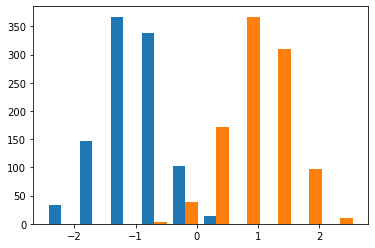

In [7]:
n, bins, _ = plt.hist(x)

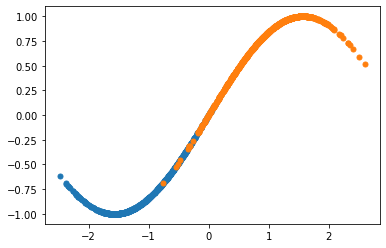

In [9]:
y = np.sin(x)
plt.plot(x, y, marker='o', markersize=5, linewidth=0.0);

In [10]:
def my_surface(x, y):
    x0 = 5*np.sin(y)
    sigma = 5+y
    amp = (10-y)
    return amp*np.exp(-(x-x0)**2/sigma**2)

In [11]:
x = np.linspace(-40, 40, 100)
y = np.linspace(0, 20, 200)

In [13]:
xx, yy = np.meshgrid(x, y)
Z = my_surface(xx, yy)
print(xx.shape, yy.shape, Z.shape)

(200, 100) (200, 100) (200, 100)


In [14]:
# Create a simple 2-variables function
def f(x, y):
    return x**2+y**2

# Define x-values, y-values and create the 2D
x, y = np.arange(0, 2), np.arange(2, 4)
xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)

# Printing arrays
print('Array values:')
print('xx={}'.format(xx))
print('yy={}'.format(yy))
print('zz={}'.format(zz))

Array values:
xx=[[0 1]
 [0 1]]
yy=[[2 2]
 [3 3]]
zz=[[ 4  5]
 [ 9 10]]


In [16]:
import pandas as pd
df = pd.read_csv('../data/WaveData.csv')
df.head(10)

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,01/01/2017 00:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90
1,01/01/2017 00:30,0.875,1.39,4.421,4.506,-99.9,-99.90
2,01/01/2017 01:00,0.763,1.15,4.520,5.513,49.0,25.65
3,01/01/2017 01:30,0.770,1.41,4.582,5.647,75.0,25.50
4,01/01/2017 02:00,0.747,1.16,4.515,5.083,91.0,25.45
5,01/01/2017 02:30,0.718,1.61,4.614,6.181,68.0,25.45
6,01/01/2017 03:00,0.707,1.34,4.568,4.705,73.0,25.50
7,01/01/2017 03:30,0.729,1.21,4.786,4.484,63.0,25.50
8,01/01/2017 04:00,0.733,1.20,4.897,5.042,68.0,25.50
9,01/01/2017 04:30,0.711,1.29,5.019,8.439,66.0,25.50


In [17]:
# Rename columns names using df.rename() function
old_new_cols = {
    'Date/Time': 'date',
    'Hs': 'height',
    'Hmax': 'heightMax',
    'Tz': 'period',
    'Tp': 'energy',
    'Peak Direction': 'direction',
    'SST': 'temperature'
}

df.rename(columns=old_new_cols, inplace=True)
df

,date,height,heightMax,period,energy,direction,temperature
0,01/01/2017 00:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90
1,01/01/2017 00:30,0.875,1.39,4.421,4.506,-99.9,-99.90
2,01/01/2017 01:00,0.763,1.15,4.520,5.513,49.0,25.65
3,01/01/2017 01:30,0.770,1.41,4.582,5.647,75.0,25.50
4,01/01/2017 02:00,0.747,1.16,4.515,5.083,91.0,25.45
...,...,...,...,...,...,...,...
43723,30/06/2019 21:30,2.299,3.60,9.281,12.765,94.0,21.95
43724,30/06/2019 22:00,2.075,3.04,9.303,12.722,95.0,21.95
43725,30/06/2019 22:30,2.157,3.43,9.168,12.890,97.0,21.95
43726,30/06/2019 23:00,2.087,2.84,8.706,10.963,92.0,21.95


In [20]:
for c in df.columns:
    print()
    print(df[c])


0        01/01/2017 00:00
1        01/01/2017 00:30
2        01/01/2017 01:00
3        01/01/2017 01:30
4        01/01/2017 02:00
               ...       
43723    30/06/2019 21:30
43724    30/06/2019 22:00
43725    30/06/2019 22:30
43726    30/06/2019 23:00
43727    30/06/2019 23:30
Name: date, Length: 43728, dtype: object

0       -99.900
1         0.875
2         0.763
3         0.770
4         0.747
          ...  
43723     2.299
43724     2.075
43725     2.157
43726     2.087
43727     1.926
Name: height, Length: 43728, dtype: float64

0       -99.90
1         1.39
2         1.15
3         1.41
4         1.16
         ...  
43723     3.60
43724     3.04
43725     3.43
43726     2.84
43727     2.98
Name: heightMax, Length: 43728, dtype: float64

0       -99.900
1         4.421
2         4.520
3         4.582
4         4.515
          ...  
43723     9.281
43724     9.303
43725     9.168
43726     8.706
43727     8.509
Name: period, Length: 43728, dtype: float64

0       -99.900


In [27]:
col_to_keep = [c for c in df.columns if c != 'date']
df2 = df[col_to_keep]

In [28]:
df2

,height,heightMax,period,energy,direction,temperature
0,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90
1,0.875,1.39,4.421,4.506,-99.9,-99.90
2,0.763,1.15,4.520,5.513,49.0,25.65
3,0.770,1.41,4.582,5.647,75.0,25.50
4,0.747,1.16,4.515,5.083,91.0,25.45
...,...,...,...,...,...,...
43723,2.299,3.60,9.281,12.765,94.0,21.95
43724,2.075,3.04,9.303,12.722,95.0,21.95
43725,2.157,3.43,9.168,12.890,97.0,21.95
43726,2.087,2.84,8.706,10.963,92.0,21.95


In [30]:
df2_bad = df2[df2<-99]
df2_bad.describe()

,height,heightMax,period,energy,direction,temperature
count,85.0,85.0,85.0,85.0,2.710000e+02,262.0
mean,-99.9,-99.9,-99.9,-99.9,-9.990000e+01,-99.9
std,0.0,0.0,0.0,0.0,1.423715e-14,0.0
min,-99.9,-99.9,-99.9,-99.9,-9.990000e+01,-99.9
25%,-99.9,-99.9,-99.9,-99.9,-9.990000e+01,-99.9
50%,-99.9,-99.9,-99.9,-99.9,-9.990000e+01,-99.9
75%,-99.9,-99.9,-99.9,-99.9,-9.990000e+01,-99.9
max,-99.9,-99.9,-99.9,-99.9,-9.990000e+01,-99.9


In [33]:
df_good = df2[df2>-99]
df_good

,height,heightMax,period,energy,direction,temperature
0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.875,1.39,4.421,4.506,NaN,NaN
2,0.763,1.15,4.520,5.513,49.0,25.65
3,0.770,1.41,4.582,5.647,75.0,25.50
4,0.747,1.16,4.515,5.083,91.0,25.45
...,...,...,...,...,...,...
43723,2.299,3.60,9.281,12.765,94.0,21.95
43724,2.075,3.04,9.303,12.722,95.0,21.95
43725,2.157,3.43,9.168,12.890,97.0,21.95
43726,2.087,2.84,8.706,10.963,92.0,21.95


In [34]:
df_good.describe()

,height,heightMax,period,energy,direction,temperature
count,43643.000000,43643.000000,43643.000000,43643.000000,43457.000000,43466.000000
mean,1.237735,2.090030,5.617440,9.006583,98.625653,23.949464
std,0.528257,0.897037,0.928361,2.391159,24.276846,2.231073
min,0.294000,0.510000,3.076000,2.720000,5.000000,19.800000
25%,0.840000,1.410000,4.977000,7.290000,85.000000,21.900000
50%,1.130000,1.900000,5.527000,8.884000,101.000000,23.950000
75%,1.543000,2.600000,6.164000,10.671000,116.000000,26.050000
max,4.257000,7.906000,10.921000,21.121000,358.000000,28.650000


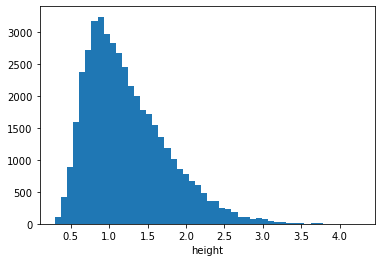

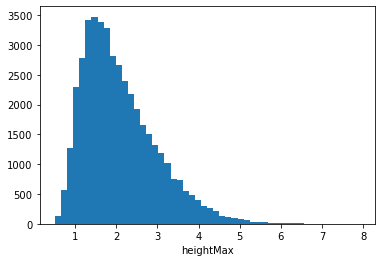

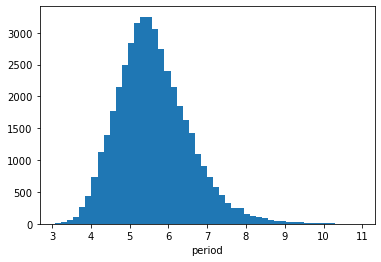

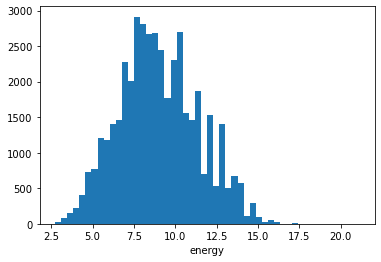

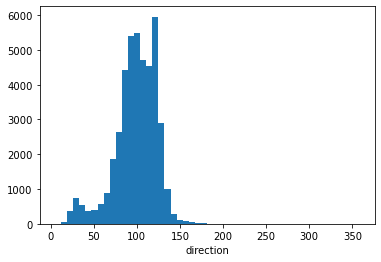

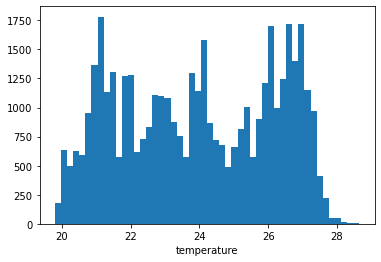

In [54]:
for c in df_good.columns:
    plt.figure()
    plt.hist(df_good[c], bins=50)
    plt.xlabel(c)

In [38]:
df_model = df_good[['energy', 'height', 'period']]

In [41]:
def model(h, p):
    return h/p + 10

In [42]:
df_model['energy_pred'] = model(df_model.height, df_model.period)

/tmp/ipykernel_3463/3750815480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['energy_pred'] = model(df_model.height, df_model.period)


In [43]:
df_model

,energy,height,period,energy_pred
0,NaN,NaN,NaN,NaN
1,4.506,0.875,4.421,10.197919
2,5.513,0.763,4.520,10.168805
3,5.647,0.770,4.582,10.168049
4,5.083,0.747,4.515,10.165449
...,...,...,...,...
43723,12.765,2.299,9.281,10.247710
43724,12.722,2.075,9.303,10.223046
43725,12.890,2.157,9.168,10.235275
43726,10.963,2.087,8.706,10.239720


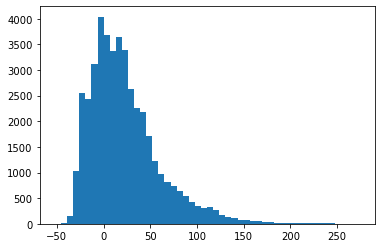

In [47]:
rel_diff = (df_model.energy_pred - df_model.energy) / df_model.energy * 100
plt.hist(rel_diff, bins=50);

In [48]:
def model2(h, p):
    pred1 = model(h,p)
    return pred1 - 0.25*(pred1)

df_model['energy_pred2'] = model2(df_model.height, df_model.period)

/tmp/ipykernel_3463/419294234.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['energy_pred2'] = model2(df_model.height, df_model.period)


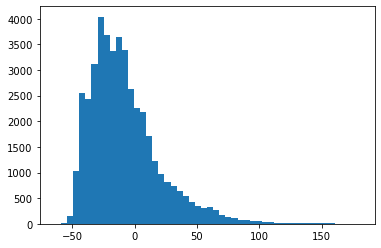

In [49]:
rel_diff2 = (df_model.energy_pred2 - df_model.energy) / df_model.energy * 100
plt.hist(rel_diff2, bins=50);

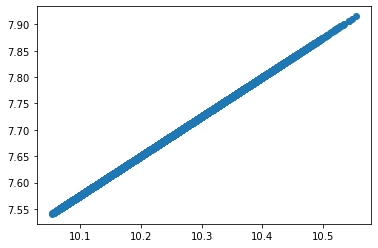

In [51]:
plt.scatter(df_model.energy_pred, df_model.energy_pred2);

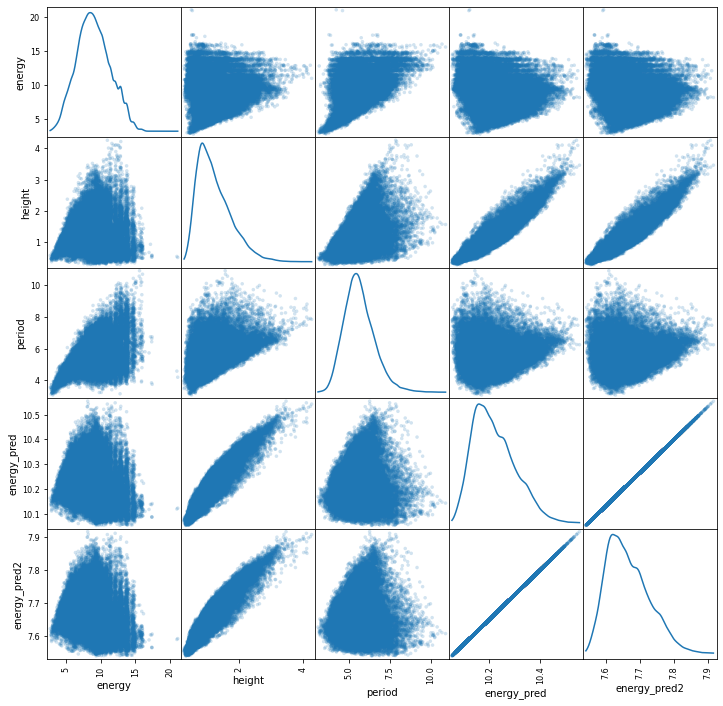

In [53]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_model, figsize=(12, 12), alpha=0.2, s=50, diagonal='kde');

In [58]:
df3 = df_model.copy()
df3['newFeature2'] = df_model.energy + 3

In [60]:
df3

,energy,height,period,energy_pred,energy_pred2,newFeature,newFeature2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.506,0.875,4.421,10.197919,7.648439,7.506,7.506
2,5.513,0.763,4.520,10.168805,7.626604,8.513,8.513
3,5.647,0.770,4.582,10.168049,7.626037,8.647,8.647
4,5.083,0.747,4.515,10.165449,7.624086,8.083,8.083
...,...,...,...,...,...,...,...
43723,12.765,2.299,9.281,10.247710,7.685783,15.765,15.765
43724,12.722,2.075,9.303,10.223046,7.667285,15.722,15.722
43725,12.890,2.157,9.168,10.235275,7.676456,15.890,15.890
43726,10.963,2.087,8.706,10.239720,7.679790,13.963,13.963


In [61]:
from scipy import optimize
from scipy import stats

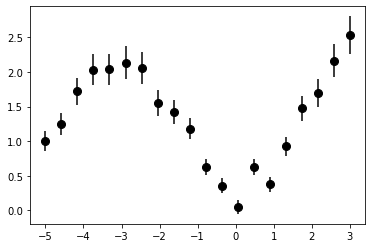

In [67]:
Npoints, Nsampling = 20, 1000
xcont = np.linspace(-5.0, 3.5, Nsampling)
x = np.linspace(-5, 3.0, Npoints)
y = 2*(np.sin(x/2)**2 + np.random.random(Npoints)*0.3)
dy = np.sqrt(0.10**2 + (0.10*y)**2)

style = {'marker': 'o', 'color': 'black', 'markersize': 8,
         'linestyle': '', 'zorder': 10, 'label': 'Data'}
plt.errorbar(x, y, yerr=dy, **style);

In [68]:
def pol1(x, p0, p1):
    return p0 + x*p1

In [69]:
p, cov = optimize.curve_fit(pol1, x, y, sigma=dy)

In [70]:
print(p)
print(cov)

[ 0.8847189  -0.08533811]
[[0.02525929 0.00382976]
 [0.00382976 0.00512608]]


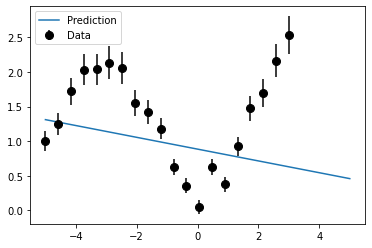

In [72]:
Xs = np.linspace(-5, 5, 10000)
Pred = pol1(Xs, *p)
plt.plot(Xs, Pred, label='Prediction')

style = {'marker': 'o', 'color': 'black', 'markersize': 8,
         'linestyle': '', 'zorder': 10, 'label': 'Data'}
plt.errorbar(x, y, yerr=dy, **style);
plt.legend();


In [111]:
def pol_func(x, *coeff):
    '''Arbitrary degree polynom: f(x) = a0 + a1*x + a2*x^2 + ... aN*x^N'''
    nDegree = len(coeff)
    a = np.array([coeff[i]*x**i for i in range(nDegree)])
    return np.sum(a)

pol_func = np.vectorize(pol_func)

In [110]:
res = pol_func(2.0, 0, 2.2, 3, 5)
print(res)

56.4


In [112]:
def fit_polynom(degree):
    
    nPars = degree+1
    p0, pmin, pmax = [1.0]*nPars, [-10]*nPars, [10]*nPars
    
    fit_options = {'p0': p0, 'bounds': (pmin, pmax), 'check_finite': True}
    par, cov = optimize.curve_fit(pol_func, x, y, sigma=dy, **fit_options)
    
    return par, cov

degree_max = 12

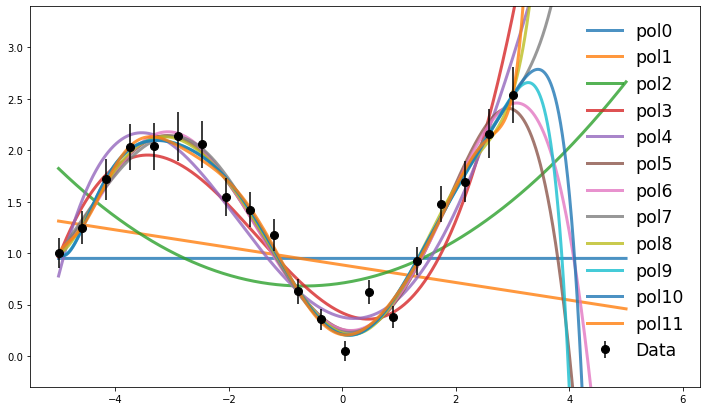

In [113]:
# Figure for the result
fig = plt.figure(figsize=(12,7))

# Fitting & plotting 
for d in np.arange(0, degree_max):
    par, cov = fit_polynom(d)
    plt.plot(Xs, pol_func(Xs, *par), label='pol{}'.format(d), 
             linewidth=3, alpha=0.8)

# Plotting data
style = {'marker': 'o', 'color': 'black', 'markersize': 8,
         'linestyle': '', 'zorder': 10, 'label': 'Data'}
plt.errorbar(x, y, yerr=dy, **style)

# Plot cosmetics
plt.xlim(-5.5, 6.3)
plt.ylim(-0.3, 3.4)
plt.legend(frameon=False, fontsize='xx-large');